<a href="https://colab.research.google.com/github/Yadavrahulbabulal/Python_Code/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [42]:
customers.info()
products.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [43]:
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [44]:
products['Price'] = products['Price'].fillna(products['Price'].median())

In [45]:
transactions = transactions.merge(products, on='ProductID', how='left')
full_data = transactions.merge(customers, on='CustomerID', how='left')

In [46]:
print([transactions,full_data, products['Price'] ])

[    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue  Price_x                      ProductName     Category  \
0        300.68   300.68  ComfortLiving Bluetoot

In [47]:
full_data['TransactionDate'] = pd.to_datetime(full_data['TransactionDate'])
full_data['SignupDate'] = pd.to_datetime(full_data['SignupDate'])
full_data['SignupDuration'] = (full_data['TransactionDate'] - full_data['SignupDate']).dt.days


In [48]:
customer_summary = full_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Category': lambda x: x.mode()[0]
}).reset_index().rename(columns={'TotalValue': 'TotalSpending', 'TransactionID': 'TransactionCount'})


In [49]:
customer_summary.head()

,CustomerID,TotalSpending,TransactionCount,Category
0,C0001,3354.52,5,Electronics
1,C0002,1862.74,4,Clothing
2,C0003,2725.38,4,Home Decor
3,C0004,5354.88,8,Books
4,C0005,2034.24,3,Electronics


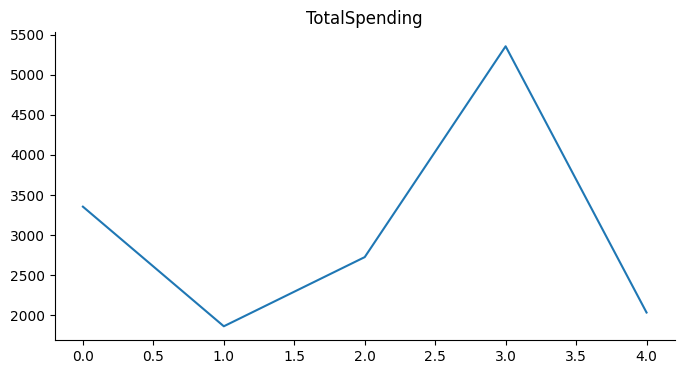

In [50]:
from matplotlib import pyplot as plt
_df_24['TotalSpending'].plot(kind='line', figsize=(8, 4), title='TotalSpending')
plt.gca().spines[['top', 'right']].set_visible(False)

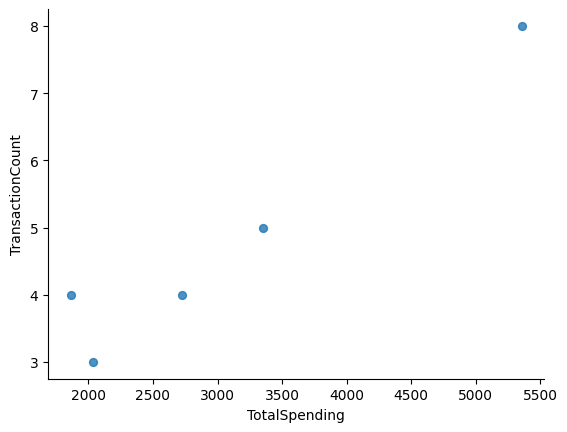

In [51]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='TotalSpending', y='TransactionCount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

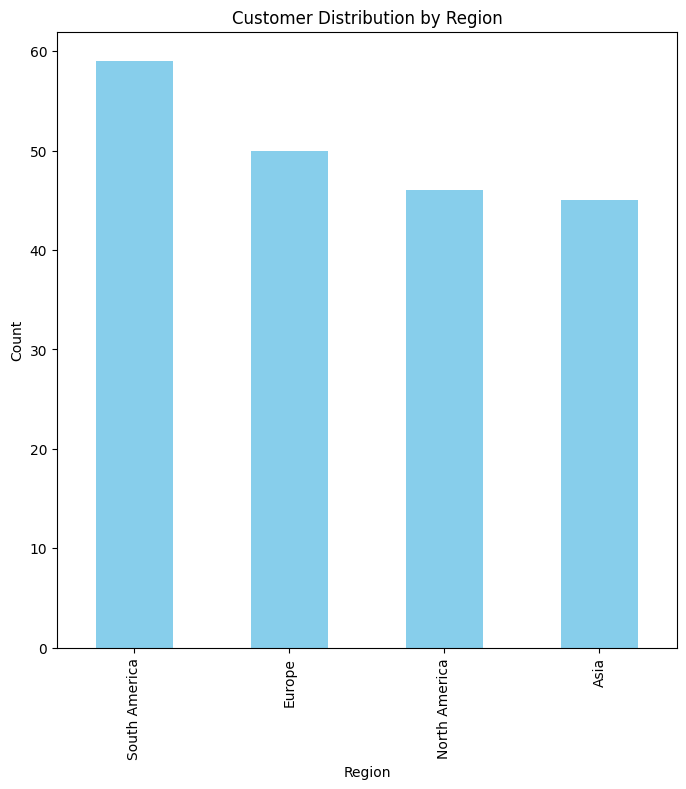

In [52]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 8))
region_counts.plot(kind='bar', color='skyblue')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

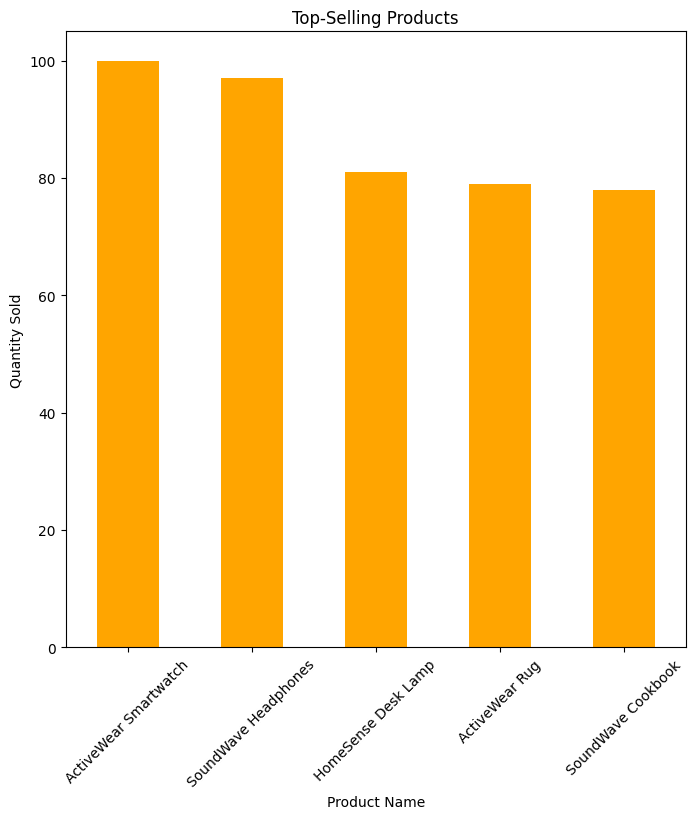

In [58]:
top_products = full_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', color='orange', figsize=(8, 8))
plt.title("Top-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

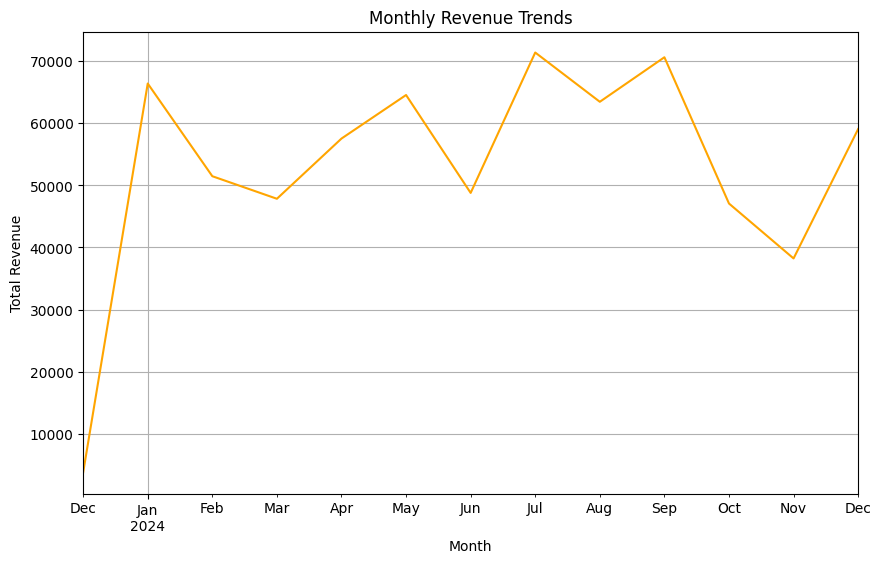

In [54]:
full_data['TransactionMonth'] = full_data['TransactionDate'].dt.to_period('M')
monthly_revenue = full_data.groupby('TransactionMonth')['TotalValue'].sum()
monthly_revenue.plot(figsize=(10, 6), color='orange')
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()

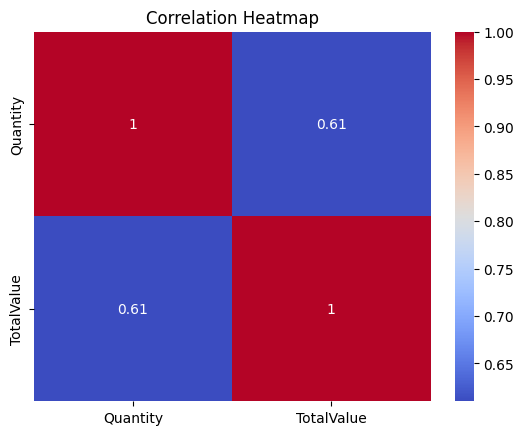

In [55]:
corr_matrix = full_data[['Quantity',  'TotalValue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()